<a href="https://colab.research.google.com/github/innosoft21/workspace/blob/main/tensorflow_python/2_2_Cats_Dogs_Augmentation_%EB%B9%84%EA%B5%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2-2주차 Cats v Dogs Augmentation

이제 각각 32, 64, 128 및 128 컨볼 루션이있는 4 개의 컨볼 루션 레이어가 존재

손실과 정확도의 그래프를 그리고 100 epoch 동안 훈련 될 것

결과는 Augmentation+ Dropout 추가할 때가 가장 좋다.

예제 1. Augmentation 없을 때


In [1]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2021-05-03 05:42:45--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 64.233.187.128, 64.233.189.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  52.1MB/s    in 1.3s    

2021-05-03 05:42:47 (52.1 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [4]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [7]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/100
100/100 - 41s - loss: 0.6886 - accuracy: 0.5320 - val_loss: 0.6805 - val_accuracy: 0.5600
Epoch 2/100
100/100 - 11s - loss: 0.6501 - accuracy: 0.6100 - val_loss: 0.7018 - val_accuracy: 0.5310
Epoch 3/100
100/100 - 10s - loss: 0.6088 - accuracy: 0.6600 - val_loss: 0.6042 - val_accuracy: 0.6840
Epoch 4/100
100/100 - 10s - loss: 0.5792 - accuracy: 0.6935 - val_loss: 0.5828 - val_accuracy: 0.7090
Epoch 5/100
100/100 - 10s - loss: 0.5461 - accuracy: 0.7295 - val_loss: 0.5860 - val_accuracy: 0.6830
Epoch 6/100
100/100 - 10s - loss: 0.5158 - accuracy: 0.7570 - val_loss: 0.5704 - val_accuracy: 0.6980
Epoch 7/100
100/100 - 10s - loss: 0.4958 - accuracy: 0.7640 - val_loss: 0.5433 - val_accuracy: 0.7260
Epoch 8/100
100/100 - 10s - loss: 0.4698 - accuracy: 0.7760 - val_loss: 0.5466 - val_accuracy: 0.7240
Epoch 9/100
100/100 - 10s - loss: 0.4418 - accuracy: 0.7985 - val_loss: 0.5277 - val_accuracy: 0.7500
Epoch 10/100
100/100 - 10s - loss: 0.4134 - accuracy: 0.8125 - val_loss: 0.5706 - 

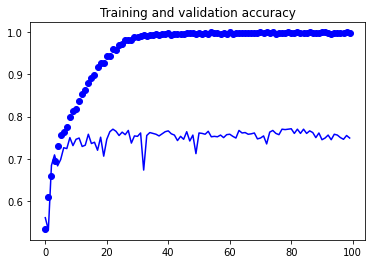

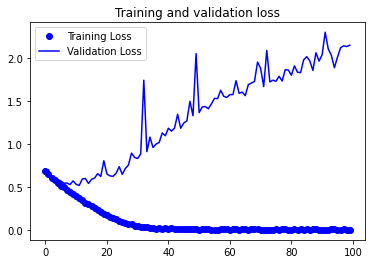

In [10]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

예제 1 은 훈련 정확도는 100 %에 가깝고 검증 정확도는 70 % -80 % 범위, 과적 합의 훌륭한 예

이미지를 약간 조정하여 이미지를 약간 변경하면 어떨까요? 이미지를 회전하고 스쿼시하는 등의 작업을 수행 할 수 있습니다. 

이것이 바로 이미지 확대에 관한 것입니다. 그리고 쉽게 만드는 API가 있습니다.

rotation_range는 그림을 임의로 회전 할 범위 인 각도 (0-180) 값입니다.

width_shift 및 height_shift는 그림을 세로 또는 가로로 무작위로 번역 할 범위 (총 너비 또는 높이의 일부)입니다.

shear_range는 전단 변환을 무작위로 적용하기위한 것입니다.

zoom_range는 사진 내부를 무작위로 확대하기위한 것입니다.

horizontal_flip은 이미지의 절반을 가로로 무작위로 뒤집기위한 것입니다. 이것은 수평 비대칭에 대한 가정이 없을 때 관련됩니다 (예 : 실제 그림).

fill_mode는 새로 생성 된 픽셀을 채우는 데 사용되는 전략으로, 회전 또는 너비 / 높이 이동 후에 나타날 수 있습니다.

예제 2. Image Augmentation을 추가 한 코드입니다. 영향을 확인하려면 실행하십시오.

In [11]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2021-05-03 06:07:04--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  64.1MB/s    in 1.0s    

2021-05-03 06:07:05 (64.1 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [13]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [15]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [16]:
# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [17]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/100
100/100 - 22s - loss: 0.6895 - accuracy: 0.5345 - val_loss: 0.6811 - val_accuracy: 0.5800
Epoch 2/100
100/100 - 20s - loss: 0.6791 - accuracy: 0.5715 - val_loss: 0.6533 - val_accuracy: 0.6110
Epoch 3/100
100/100 - 20s - loss: 0.6667 - accuracy: 0.6020 - val_loss: 0.6450 - val_accuracy: 0.6290
Epoch 4/100
100/100 - 20s - loss: 0.6627 - accuracy: 0.5935 - val_loss: 0.6185 - val_accuracy: 0.6540
Epoch 5/100
100/100 - 20s - loss: 0.6359 - accuracy: 0.6255 - val_loss: 0.6185 - val_accuracy: 0.6660
Epoch 6/100
100/100 - 20s - loss: 0.6305 - accuracy: 0.6425 - val_loss: 0.5899 - val_accuracy: 0.6790
Epoch 7/100
100/100 - 20s - loss: 0.6129 - accuracy: 0.6695 - val_loss: 0.5796 - val_accuracy: 0.6790
Epoch 8/100
100/100 - 20s - loss: 0.6104 - accuracy: 0.6670 - val_loss: 0.5813 - val_accuracy: 0.6860
Epoch 9/100
100/100 - 20s - loss: 0.5934 - accuracy: 0.6855 - val_loss: 0.5671 - val_accuracy: 0.6880
Epoch 10/100
100/100 - 20s - loss: 0.5868 - accuracy: 0.6850 - val_loss: 0.5364 - 

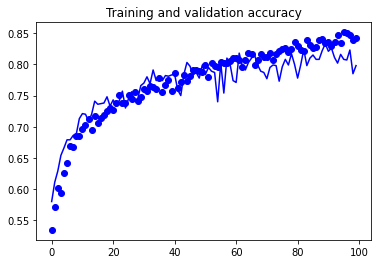

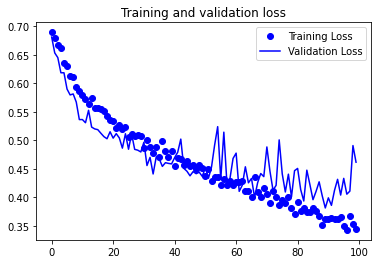

In [18]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

예제3. Dropout을 넣었을 때 결과가 가장 좋다. Flatten() 바로 전에 추가

In [19]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2021-05-03 06:40:39--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   116MB/s    in 0.6s    

2021-05-03 06:40:40 (116 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [21]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [23]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [24]:
# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [25]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/100
100/100 - 22s - loss: 0.6944 - accuracy: 0.5035 - val_loss: 0.6884 - val_accuracy: 0.5430
Epoch 2/100
100/100 - 20s - loss: 0.6893 - accuracy: 0.5330 - val_loss: 0.6741 - val_accuracy: 0.5500
Epoch 3/100
100/100 - 20s - loss: 0.6798 - accuracy: 0.5735 - val_loss: 0.6538 - val_accuracy: 0.6260
Epoch 4/100
100/100 - 20s - loss: 0.6725 - accuracy: 0.5805 - val_loss: 0.6467 - val_accuracy: 0.6110
Epoch 5/100
100/100 - 20s - loss: 0.6623 - accuracy: 0.6100 - val_loss: 0.6244 - val_accuracy: 0.6620
Epoch 6/100
100/100 - 20s - loss: 0.6488 - accuracy: 0.6295 - val_loss: 0.6037 - val_accuracy: 0.6680
Epoch 7/100
100/100 - 21s - loss: 0.6284 - accuracy: 0.6350 - val_loss: 0.5830 - val_accuracy: 0.7050
Epoch 8/100
100/100 - 21s - loss: 0.6203 - accuracy: 0.6625 - val_loss: 0.6002 - val_accuracy: 0.6570
Epoch 9/100
100/100 - 21s - loss: 0.6115 - accuracy: 0.6605 - val_loss: 0.5901 - val_accuracy: 0.6800
Epoch 10/100
100/100 - 21s - loss: 0.6070 - accuracy: 0.6730 - val_loss: 0.6252 - 

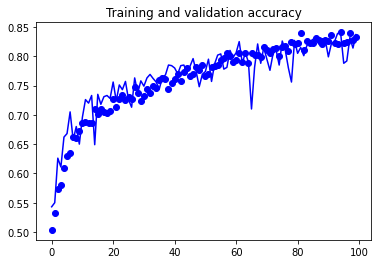

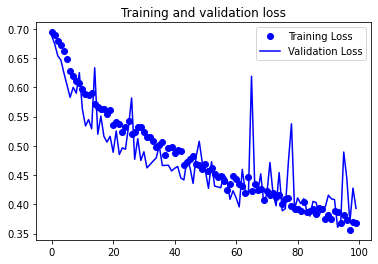

In [26]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()